Python3 |  Machine learning |PCA

Problem statement:
For the given datapoint model has to predict the type of activity:      
STANDING,SITTING, LAYING, WALKING, WALKING_DOWNSTAIRS,'WALKING_UPSTAIRS

#Dataset description:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




*   Dataset size 27MB
*  Dataset contains triaxial acceleration and tri-axial angular velocity     components of 30 persons using accelero meter and gyro scope
*  Triaxial means measuring the velocity and acceleration of the body along the 3 cartesian co-ordinates(x-axis,y-axis and z-axis)
*   Accelerometer measure the linear motion of the object
*   Gyro meter measure the tilt or lateral orientation







*Dataset* is collected from UCI machine learning repository  
Download dataset [here](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones)


 *Feature description*    
 --------- Domain terms --------------

*   t- prefix in the dataset denotes the time 
*   XYZ denotes the 3 directions


*   Sensor signals are preprocessed by noise filters resulting time and   frequency components
*   Acceleration signal is divided  into **tBodyAcceleration -XYZ and    tGravityAcc-XYZ**
 
*  Body linear acceleration and angular velocity is divided into **tBodyAccJerk-XYZ and tBodyGyroJerk-XYZ**

*   These 3-dimentional signal magnitude is calculated **tBodyAccMag, tGravityAccMag, tBodyAccJerkMag, tBodyGyroMag and tBodyGyroJerkMag**
*  fBodyAcc-XYZ, fBodyGyroMag etc.,. frequency domain signals



--------- statistical parameters  ------------   
mean() : Mean value   
std() : standard deviation. 
max() : maximum value in the array.  
min() : minimum value in the array. 
sma(): signam magnitude area.  
angle(): angle between vectors.   
......















Importing libraries

In [ ]:
!pip install mpltools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np    # linear algebra 
import pandas as pd   # Data preprocessing
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # data visualization
import plotly.express as px
import os                         # file operations
# import sklearn learn library helper functions
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

##  data collection

In [3]:
train_data = pd.read_csv('/content/drive/MyDrive/ML Project/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/ML Project/test.csv')
print('distribution of train and test data:')
print('train data samples',train_data.shape)
print('test data samples',test_data.shape)

distribution of train and test data:
train data samples (7352, 563)
test data samples (2947, 563)


In [4]:
test_data

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.257178          -0.023285          -0.014654   
1              0.286027          -0.013163          -0.119083   
2              0.275485          -0.026050          -0.118152   
3              0.270298          -0.032614          -0.117520   
4              0.274833          -0.027848          -0.129527   
...                 ...                ...                ...   
2942           0.310155          -0.053391          -0.099109   
2943           0.363385          -0.039214          -0.105915   
2944           0.349966           0.030077          -0.115788   
2945           0.237594           0.018467          -0.096499   
2946           0.153627          -0.018437          -0.137018   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.938404         -0.920091         -0.667683         -0.952501   
1            -0.975415         -0.967458         -0.944958         -0.986799   
2            -0.993819         -0.969926         -0.962748         -0.994403   
3            -0.994743         -0.973268         -0.967091         -0.995274   
4            -0.993852         -0.967445         -0.978295         -0.994111   
...                ...               ...               ...               ...   
2942         -0.287866         -0.140589         -0.215088         -0.356083   
2943         -0.305388          0.028148         -0.196373         -0.373540   
2944         -0.329638         -0.042143         -0.250181         -0.388017   
2945         -0.323114         -0.229775         -0.207574         -0.392380   
2946         -0.330046         -0.195253         -0.164339         -0.430974   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
0            -0.925249         -0.674302         -0.894088  ...   
1            -0.968401         -0.945823         -0.894088  ...   
2            -0.970735         -0.963483         -0.939260  ...   
3            -0.974471         -0.968897         -0.938610  ...   
4            -0.965953         -0.977346         -0.938610  ...   
...                ...               ...               ...  ...   
2942         -0.148775         -0.232057          0.185361  ...   
2943         -0.030036         -0.270237          0.185361  ...   
2944         -0.133257         -0.347029          0.007471  ...   
2945         -0.279610         -0.289477          0.007471  ...   
2946         -0.218295         -0.229933         -0.111527  ...   

      fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
0                           -0.705974                     0.006462   
1                           -0.594944                    -0.083495   
2                           -0.640736                    -0.034956   
3                           -0.736124                    -0.017067   
4                           -0.846595                    -0.002223   
...                               ...                          ...   
2942                        -0.750809                    -0.337422   
2943                        -0.700274                    -0.736701   
2944                        -0.467179                    -0.181560   
2945                        -0.617737                     0.444558   
2946                        -0.436940                     0.598808   

      angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
0                                 0.162920                         -0.825886   
1                                 0.017500                         -0.434375   
2                                 0.202302                          0.064103   
3                                 0.154438                          0.340134   
4                                -0.040046                          0.736715   
...                                    ...                               ...   
2942                              0.346295                

## Knowing data

In [5]:
#train data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [6]:
train_data.select_dtypes(include=int)

subject
0           1
1           1
2           1
3           1
4           1
...       ...
7347       30
7348       30
7349       30
7350       30
7351       30

[7352 rows x 1 columns]

👉 train data contains  7352 entries and 563 columns 
*  561 floating numbers
*   One int number column------------subject type i.e.(1-30) person id
*   one object type category----label  
**No null values in the data**






In [7]:
#test data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


Types of activities

In [8]:
#Activities
train_data.Activity.unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [9]:
#int object type column
train_data.select_dtypes('object')

Activity
0             STANDING
1             STANDING
2             STANDING
3             STANDING
4             STANDING
...                ...
7347  WALKING_UPSTAIRS
7348  WALKING_UPSTAIRS
7349  WALKING_UPSTAIRS
7350  WALKING_UPSTAIRS
7351  WALKING_UPSTAIRS

[7352 rows x 1 columns]

Checking for null values

In [10]:
#train and test set
nan_cols_train = [i for i in train_data.columns if train_data[i].isnull().any()]
nan_cols_test = [i for i in test_data.columns if test_data[i].isnull().any()]
nan_cols_train,nan_cols_test

([], [])

👉 No null values in the train and test set

## Data Cleaning

Checking for duplicate columns

In [17]:
duplicateColumnNames = set()

def DupColumns(data):
  for x in range(data.shape[1]):
    col = data.iloc[:,x]

    for y in range(x+1, train_data.shape[1]):
      other_col = data.iloc[:,y]

      if x == y:
        duplicateColumnNames.add(data.columns.values[y])

    return list(duplicateColumnNames)

In [18]:
Dup_col_train = DupColumns(train_data)
Dup_col_test = DupColumns(test_data)
print('Duplicate columns in training data',Dup_col_train)
print('Duplicate coluns in testing data',Dup_col_test)


Duplicate columns in training data []
Duplicate coluns in testing data []


👉 There are no duplicate columns in the dataset

Label encoding

In [23]:
#creating label encoder object
labelencoder = LabelEncoder()

#assigning numerical values to the categorical values
train_data['Activity'] = labelencoder.fit_transform(train_data['Activity'])
test_data['Activity'] = labelencoder.fit_transform(test_data['Activity'])

In [20]:
labelencoder.inverse_transform([0,1,2,3,4,5])

array([0, 1, 2, 3, 4, 5])

In [24]:
 #train features and labels
 X_train = train_data.drop(['Activity','subject'],axis=1)
 y_train = train_data['Activity']

 #test features  and labels
 X_test = test_data.drop(['Activity','subject'],axis=1)
 y_test = test_data['Activity']

In [22]:
X_train

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.288585          -0.020294          -0.132905   
1              0.278419          -0.016411          -0.123520   
2              0.279653          -0.019467          -0.113462   
3              0.279174          -0.026201          -0.123283   
4              0.276629          -0.016570          -0.115362   
...                 ...                ...                ...   
7347           0.299665          -0.057193          -0.181233   
7348           0.273853          -0.007749          -0.147468   
7349           0.273387          -0.017011          -0.045022   
7350           0.289654          -0.018843          -0.158281   
7351           0.351503          -0.012423          -0.203867   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.995279         -0.983111         -0.913526         -0.995112   
1            -0.998245         -0.975300         -0.960322         -0.998807   
2            -0.995380         -0.967187         -0.978944         -0.996520   
3            -0.996091         -0.983403         -0.990675         -0.997099   
4            -0.998139         -0.980817         -0.990482         -0.998321   
...                ...               ...               ...               ...   
7347         -0.195387          0.039905          0.077078         -0.282301   
7348         -0.235309          0.004816          0.059280         -0.322552   
7349         -0.218218         -0.103822          0.274533         -0.304515   
7350         -0.219139         -0.111412          0.268893         -0.310487   
7351         -0.269270         -0.087212          0.177404         -0.377404   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
0            -0.983185         -0.923527         -0.934724  ...   
1            -0.974914         -0.957686         -0.943068  ...   
2            -0.963668         -0.977469         -0.938692  ...   
3            -0.982750         -0.989302         -0.938692  ...   
4            -0.979672         -0.990441         -0.942469  ...   
...                ...               ...               ...  ...   
7347          0.043616          0.060410          0.210795  ...   
7348         -0.029456          0.080585          0.117440  ...   
7349         -0.098913          0.332584          0.043999  ...   
7350         -0.068200          0.319473          0.101702  ...   
7351         -0.038678          0.229430          0.269013  ...   

      fBodyBodyGyroJerkMag-meanFreq()  fBodyBodyGyroJerkMag-skewness()  \
0                           -0.074323                        -0.298676   
1                            0.158075                        -0.595051   
2                            0.414503                        -0.390748   
3                            0.404573                        -0.117290   
4                            0.087753                        -0.351471   
...                               ...                              ...   
7347                        -0.070157                        -0.588433   
7348                         0.165259                        -0.390738   
7349                         0.195034                         0.025145   
7350                         0.013865                         0.063907   
7351                        -0.058402                        -0.387052   

      fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
0                           -0.710304                    -0.112754   
1                           -0.861499                     0.053477   
2                           -0.760104                    -0.118559   
3                           -0.482845                    -0.036788   
4                           -0.699205                     0.123320   
...                               ...                          ...   
7347                        -0.880324                    -0.190437   
7348      

# Exploratory Data Analysis - EDA

Target values distribution

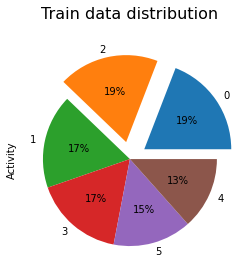

In [46]:
#barplot
#train data distributution
myexplode = [0.2, 0.2, 0, 0,0,0]
train_data['Activity'].value_counts().plot(kind='pie',autopct='%1.0f%%',explode=myexplode)
plt.title('Train data distribution',size=16, y=1.12)
plt.show()

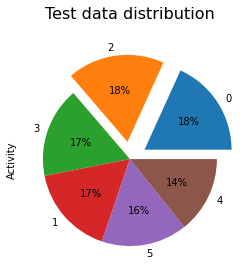

In [26]:
# test data distribution
myexplode = [0.2, 0.2, 0, 0,0,0]
test_data['Activity'].value_counts().plot(kind='pie',autopct='%1.0f%%',explode=myexplode)
plt.title('Test data distribution',size=16, y=1.12)
plt.show()

observation:
> Target values are well balanced






## Static and dynamic activity seperation


*   Static and dynamic activities can be seperated by body acceleration. 
*   LAYING:0', 'SITTING':1, 'STANDING':2, 'WALKING':3, 'WALKING_DOWNSTAIRS':4, 'WALKING_UPSTAIRS':5



      




In [47]:
filter_col = [col for col in train_data if col.startswith('f')]
# filter_col

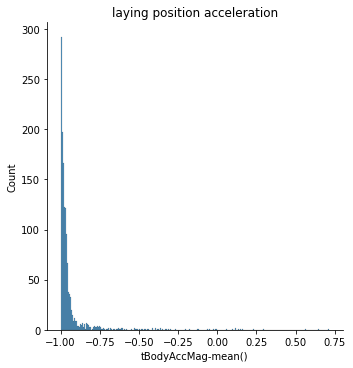

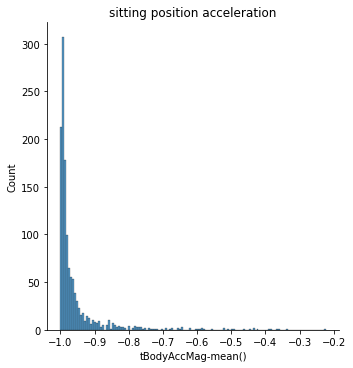

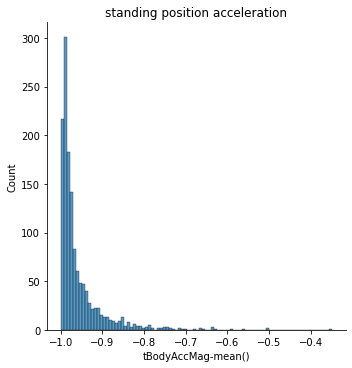

In [48]:
#static activities
df_laying = train_data[train_data['Activity']== 0]
df_sitting = train_data[train_data['Activity']==1]
df_standing = train_data[train_data['Activity']==2]
# fig,(ax1,ax2) = plt.subplots(1,2)
sns.displot(df_laying['tBodyAccMag-mean()'],ax=[0,0])
plt.title('laying position acceleration')
sns.displot(df_sitting['tBodyAccMag-mean()'],ax=[0,1])
plt.title('sitting position acceleration')
sns.displot(df_standing['tBodyAccMag-mean()'],ax=[0,3])
plt.title('standing position acceleration')
plt.show()


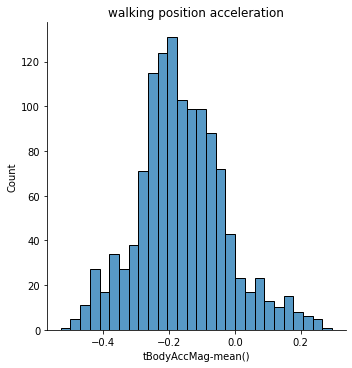

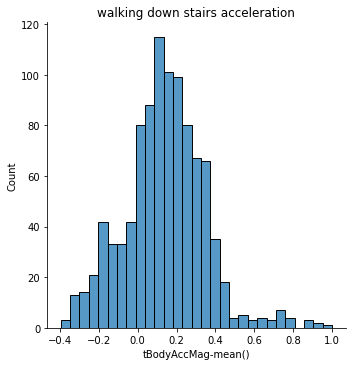

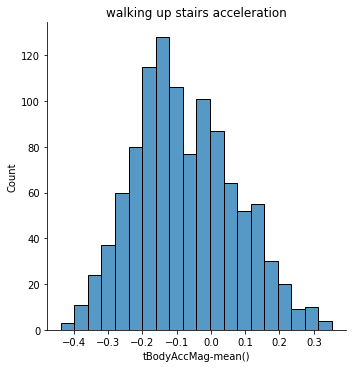

In [49]:
#dynamic activities
df_walking = train_data[train_data['Activity']== 3]
df_walking_down = train_data[train_data['Activity']==4]
df_walking_up = train_data[train_data['Activity']==5]
# fig,(ax1,ax2) = plt.subplots(1,2)
sns.displot(df_walking['tBodyAccMag-mean()'],ax=[0,0])
plt.title('walking position acceleration')
sns.displot(df_walking_down['tBodyAccMag-mean()'],ax=[0,1])
plt.title('walking down stairs acceleration')
sns.displot(df_walking_up['tBodyAccMag-mean()'],ax=[0,3])
plt.title('walking up stairs acceleration')
plt.show()




Observation: 
> Acceleration is reaching peak value at one point

> After that point acceleration is gradually decreasing

> Where as acceleration for moving activities it is not a sudden change










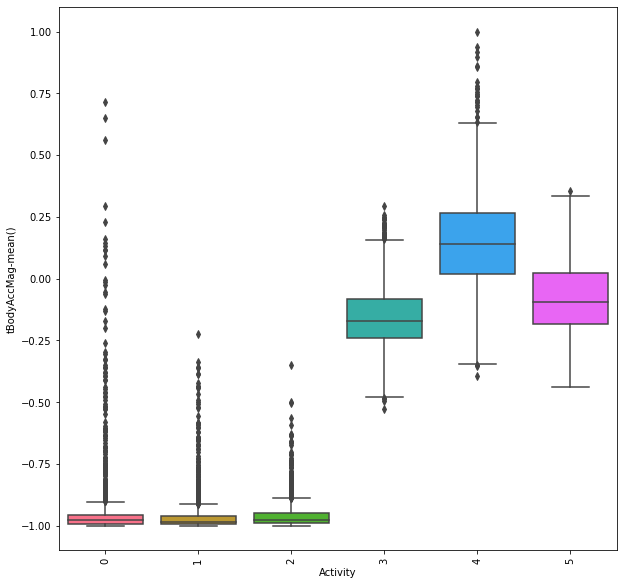

In [55]:
plt.figure(figsize=(10,10))
sns.boxplot(data=train_data,y='tBodyAccMag-mean()',x='Activity',palette='husl',saturation = 2)
plt.xticks(rotation = 90)
plt.show()


Observation


> Classification of activities are possible with tBodyAccMagmean() value




Angles towards the axis

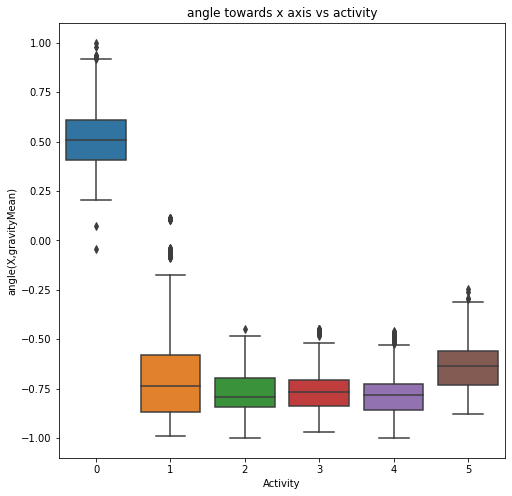

In [51]:
plt.figure(figsize=(8,8))
sns.boxplot(data= train_data,x='Activity',y='angle(X,gravityMean)')
plt.title('angle towards x axis vs activity')
plt.show()

Angle towards the y axis

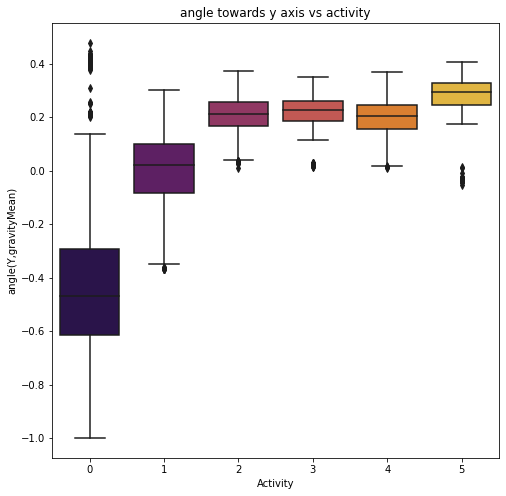

In [52]:
plt.figure(figsize=(8,8))
sns.boxplot(data= train_data,x='Activity',y='angle(Y,gravityMean)',palette='inferno')
plt.title('angle towards y axis vs activity')
plt.show()

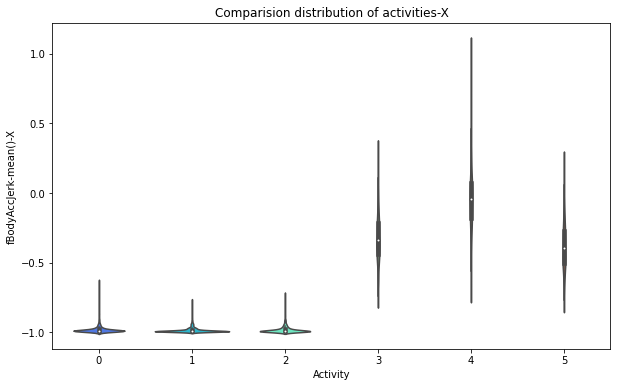

In [53]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Activity',y="fBodyAccJerk-mean()-X",data=train_data, palette='rainbow')
plt.title("Comparision distribution of activities-X")
plt.show()

Text(0.5, 1.0, 'Comparision distribution of activities-Y')

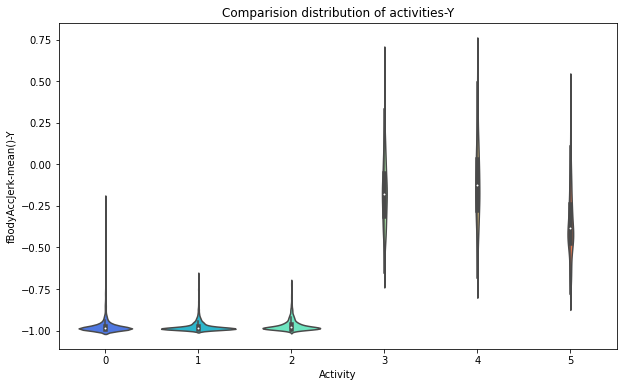

In [54]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Activity',y="fBodyAccJerk-mean()-Y",data=train_data, palette='rainbow')
plt.title("Comparision distribution of activities-Y")

Observations:


> Jerk is high in moving activities



##  PCA(Principal Component Analysis)

In [35]:
#since PCA is sensitive to scaling
# standardization of data

sc = StandardScaler()
X_standard = sc.fit_transform(X_train)
col_name = ['x' + str(idx) for idx in range(0, X_standard.shape[1])]
X_standard_test = sc.fit_transform(X_test)
X_standard

array([[ 0.20064157, -0.0636826 , -0.41962845, ..., -0.68721921,
         0.40794614, -0.00756789],
       [ 0.05594788,  0.03148567, -0.25390836, ..., -0.694138  ,
         0.40911698,  0.00787517],
       [ 0.07351535, -0.04341648, -0.07629468, ..., -0.702239  ,
         0.4102883 ,  0.02650234],
       ...,
       [-0.01566765,  0.0167814 ,  1.13222107, ..., -0.56584847,
         0.64059683,  0.34870928],
       [ 0.21586648, -0.02812252, -0.86770988, ..., -0.57766781,
         0.63147758,  0.29327564],
       [ 1.09620157,  0.12919873, -1.67268082, ..., -0.57392691,
         0.63274259,  0.33396081]])

Covariance matrix.   
Covariance measures the variance of the data points

In [36]:
#1.calculate the mean 
#2.Substract the mean from all the observations
#3.Take sum of the squares
#4.divided by total samples
mean_vec = np.mean(X_standard, axis=0)
cov_mat = (X_standard - mean_vec).T.dot((X_standard - mean_vec)) / (X_standard.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00013604  0.14808156 -0.2569868  ... -0.03526183  0.03437616
   0.02824557]
 [ 0.14808156  1.00013604 -0.07877954 ... -0.0053097   0.00105303
  -0.01390477]
 [-0.2569868  -0.07877954  1.00013604 ...  0.00858847 -0.01529038
  -0.0226464 ]
 ...
 [-0.03526183 -0.0053097   0.00858847 ...  1.00013604 -0.78395434
  -0.6437424 ]
 [ 0.03437616  0.00105303 -0.01529038 ... -0.78395434  1.00013604
   0.59496565]
 [ 0.02824557 -0.01390477 -0.0226464  ... -0.6437424   0.59496565
   1.00013604]]


In [56]:
#Shape of the covariance matrix
cov_mat.shape

(561, 561)

✴ *We can use np.covariance to calculate covariance matrix*

Eigen decomposition of covariance matrix

In [38]:
eig_values, eig_vects = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vects)
print('\nEigenvalues \n%s' %eig_values)

Eigenvectors 
[[-2.80886217e-05+0.00000000e+00j -1.56380722e-02+0.00000000e+00j
   3.24820577e-02+0.00000000e+00j ... -5.34388308e-14+0.00000000e+00j
   1.62035033e-14+3.54399745e-14j  1.62035033e-14-3.54399745e-14j]
 [ 2.47348433e-03+0.00000000e+00j  8.03820536e-05+0.00000000e+00j
  -2.69527509e-03+0.00000000e+00j ...  1.98498297e-15+0.00000000e+00j
  -6.04015377e-16-1.31832683e-15j -6.04015377e-16+1.31832683e-15j]
 [ 1.52730914e-03+0.00000000e+00j  4.05212976e-03+0.00000000e+00j
  -1.01672220e-02+0.00000000e+00j ... -4.28794991e-15+0.00000000e+00j
   1.29933653e-15+2.84241278e-15j  1.29933653e-15-2.84241278e-15j]
 ...
 [ 2.31004290e-02+0.00000000e+00j -1.74761761e-02+0.00000000e+00j
  -1.07507871e-01+0.00000000e+00j ... -2.29742651e-13+0.00000000e+00j
   6.96541341e-14+1.52355927e-13j  6.96541341e-14-1.52355927e-13j]
 [-2.97187859e-02+0.00000000e+00j  3.52131796e-02+0.00000000e+00j
   8.00525165e-02+0.00000000e+00j ... -2.65923834e-13+0.00000000e+00j
   8.06328824e-14+1.76360543e-13j

Choosing the pricipal components


*   In this step we drop those eigen vectors which have less eigen values which   means they carry least information




In [39]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_values[i]), eig_vects[:,i]) for i in range(len(eig_values))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Printing the list to confirm the order
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
284.9211307884458
36.92263841847641
15.7462520707221
14.049085822383569
10.594719999082484
9.672991689768727
7.6924206418787975
6.727740872599222
5.587531858026371
5.4148722887525995
4.825546109072807
4.490186872103283
4.286602680423896
3.620787753626223
3.5478221491356416
3.3648986120101267
3.2921169795970835
3.2284745979257234
3.186470489116458
2.9585317310936237
2.807417865986191
2.74034389271976
2.683099396610605
2.6289956262814607
2.5208556298726896
2.36228414384671
2.3451793888634715
2.2755592870147088
2.179917090552855
2.171466581615712
2.0533085908464184
1.98931504705443
1.9522235582027025
1.8918770117255306
1.8497395596616015
1.8415369109949378
1.7984149866598598
1.6586254085095726
1.6087315652013243
1.5994857731621617
1.5079841869992936
1.4903301176725758
1.4779086171999225
1.452349386359694
1.3973879027444638
1.385600594680582
1.3503979899032366
1.3247857657464315
1.2920401281717349
1.2768259158708815
1.2352919828129767
1.1977126885967813
1.1

Explained variance. 

* How many principal componets are going to be selected
* How much information is attributed to the each component



In [40]:
total = sum(eig_values)
exp_var = [(i / total)*100 for i in sorted(eig_values, reverse=True)]
exp_var = exp_var[:7]
exp_var


[(50.781172291286424+0j),
 (6.580680266812827+0j),
 (2.8064367747405794+0j),
 (2.503952745474856+0j),
 (1.888285014742624+0j),
 (1.7240064161301125+0j),
 (1.3710114685819443+0j)]

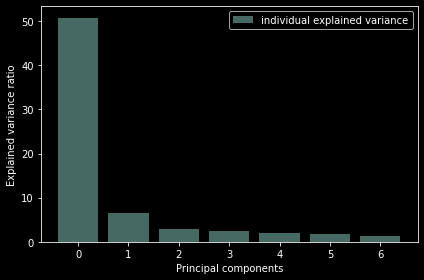

In [41]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(7), exp_var, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()





*  **Observation**


> First principal component itself contribute 50%of information   
> second component contribute 6% of information and the other components contribute (2,2,1,1) respectively  
> Total 7 components contribute 63% in total. 







In [42]:
pca = PCA(n_components = 7,svd_solver='randomized')
X_pca = pca.fit(X_standard)
X_pca_test = pca.fit_transform(X_standard_test)

In [43]:
import pickle
pickle.dump(pca, open("pca.pkl","wb"))
pca_reloaded = pickle.load(open("pca.pkl",'rb')) 

## PCA components

In [44]:
pca_components = abs(X_pca.components_)
print(pca_components)

[[0.00126007 0.0035844  0.00292111 ... 0.02353513 0.02631086 0.02494988]
 [0.02007543 0.00362102 0.00881587 ... 0.04950859 0.05684445 0.04167218]
 [0.00199308 0.00468773 0.00063987 ... 0.0260976  0.01814523 0.05163479]
 ...
 [0.01329773 0.003392   0.00916895 ... 0.07825608 0.08123006 0.0561671 ]
 [0.00120384 0.01143789 0.01286275 ... 0.12171029 0.04468969 0.0807712 ]
 [0.03777453 0.02120771 0.05384456 ... 0.01957871 0.03848996 0.02705439]]


Top 3 components most important features

In [57]:
print('Top 3 most important features in each component')
print('---------------------------------------')
for row in range(pca_components.shape[0]):
    # get the indices of the top 3 values in each row
    temp = np.argpartition(-(pca_components[row]), 3)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:3]
   
    
    # print the top 4 feature names
    print(f'Component {row}: {train_data.columns[indices].to_list()}')

Top 3 most important features in each component
---------------------------------------
Component 0: ['fBodyAcc-sma()', 'fBodyAccJerk-sma()', 'tBodyAccJerk-sma()']
Component 1: ['fBodyAcc-meanFreq()-Z', 'tGravityAcc-arCoeff()-Z,2', 'tGravityAcc-arCoeff()-Z,1']
Component 2: ['tGravityAcc-entropy()-Z', 'fBodyAccJerk-bandsEnergy()-1,16.2', 'fBodyAccJerk-bandsEnergy()-9,16.2']
Component 3: ['tGravityAcc-arCoeff()-X,1', 'tGravityAcc-arCoeff()-X,2', 'tGravityAcc-energy()-X']
Component 4: ['tGravityAcc-arCoeff()-Y,2', 'tGravityAcc-arCoeff()-Y,1', 'tGravityAcc-arCoeff()-Y,3']
Component 5: ['angle(X,gravityMean)', 'tGravityAcc-energy()-X', 'tGravityAcc-max()-X']
Component 6: ['fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()', 'fBodyAccMag-skewness()']


Feature importance


# explained_variance_ plot

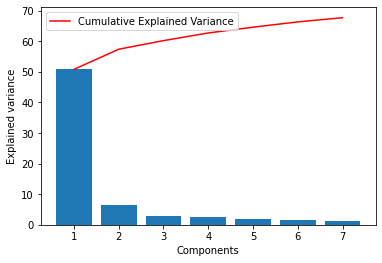

In [59]:
plt.bar(range(1,len(exp_var)+1),exp_var )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(exp_var )+1),
         np.cumsum(exp_var),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')
plt.show()

## explained_variance_ratio_ plot

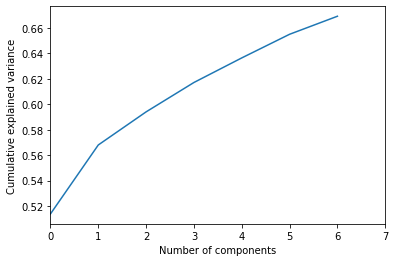

In [60]:

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

## ScreePlot

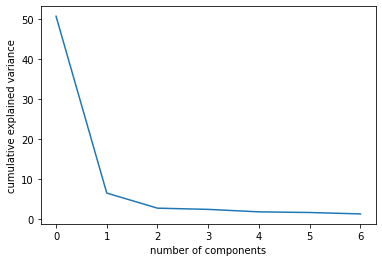

In [61]:
plt.plot(exp_var)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

## Projection of new features

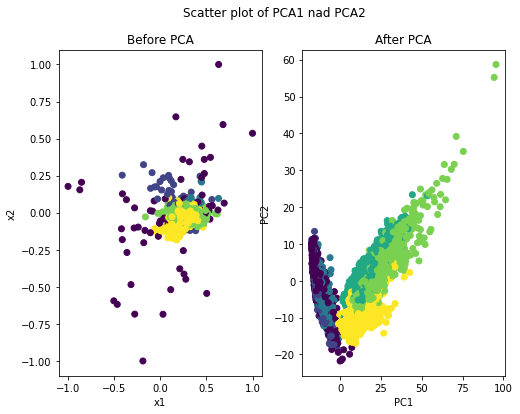

<Figure size 720x864 with 0 Axes>

In [62]:
#projection on to new space only for two features
X_pca = pca.fit_transform(X_standard)
fig, axes = plt.subplots(1,2,figsize=(8,6))
plt.figure(figsize=(10,12))
axes[0].scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=y_train)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_pca[:,0], X_pca[:,1], c=y_train)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
fig.suptitle('Scatter plot of PCA1 nad PCA2')
plt.subplots_adjust(top=0.95)
axes[1].set_title('After PCA')
plt.show()




*  Observation
> Varince is improved along the PC1 and PC2 compared to original samples



## Machine learning Models

Model 1 : Logistic regression

In [63]:

#After pca
Log_reg2  = LogisticRegression()
Log_reg2.fit(X_pca,y_train)

# model predictions
y_pred_lr = Log_reg2.predict(X_pca_test)
y_pred_lr = y_pred_lr.reshape(-1,1)


#model score
log_pca_score = accuracy_score(y_pred_lr,y_test)


# print('Logistic regression score  before applying pca',log_normal_score)
# print('Logistic regression score  before applying pca',log_pca_score)

round(log_pca_score,2)

0.5

Model 2: SVM

In [64]:

#After pca
svm2  = svm.SVC()
svm2.fit(X_pca,y_train)

# model predictions
y_pred_svm = svm2.predict(X_pca_test)
y_pred_svm= y_pred_svm.reshape(-1,1)


#model score
svm_pca_score = svm2.score(X_pca_test,y_test)
print('SVM score  after applying pca',svm_pca_score)

SVM score  after applying pca 0.4312860536138446


Model 3 :Naive Bayes

In [65]:

#After pca
naive_bayes2 = GaussianNB()
naive_bayes2.fit(X_pca,y_train)

# model predictions
y_pred_nb = naive_bayes2.predict(X_pca_test)
y_pred_nb= y_pred_nb.reshape(-1,1)

#model score
naive_bayes_pca_score = naive_bayes2.score(X_pca_test,y_test)


print('Naive Bayes score  after applying pca',svm_pca_score)

Naive Bayes score  after applying pca 0.4312860536138446


## Performance evaluation

Comparision of model scores

In [66]:
scores = pd.DataFrame({'Classifiers':['Logistic regressiom','SVM','Naive Bayes'],
                      'Accuracy':[log_pca_score,svm_pca_score,naive_bayes_pca_score]}
                      )

scores.sort_values(by='Accuracy',ascending=False).round(2)

Classifiers  Accuracy
0  Logistic regressiom      0.50
1                  SVM      0.43
2          Naive Bayes      0.39

Classification report and Confusion matrix

In [67]:
# classification report of Logistic regression
classes = ['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']
lg_cls_report = classification_report(y_test, y_pred_lr, target_names=classes)
print('classification report of Logistic Regression:\n')
print(lg_cls_report)

classification report of Logistic Regression:

                    precision    recall  f1-score   support

            LAYING       0.72      0.60      0.65       537
           SITTING       0.41      0.89      0.56       491
          STANDING       0.72      0.19      0.30       532
           WALKING       0.42      0.36      0.39       496
WALKING_DOWNSTAIRS       0.29      0.28      0.29       420
  WALKING_UPSTAIRS       0.73      0.70      0.72       471

          accuracy                           0.50      2947
         macro avg       0.55      0.50      0.48      2947
      weighted avg       0.56      0.50      0.49      2947



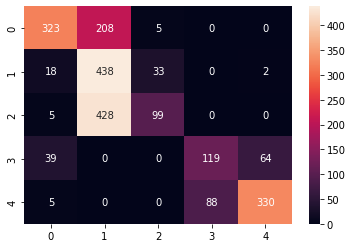

In [68]:
#confusion matrix of Logistic regression
c_mat = confusion_matrix(y_test,y_pred_lr,labels=[0,1,2,4,5])
sns.heatmap(c_mat,annot=True,fmt='g')
plt.show()

In [69]:
# classification report of Support Vector Machine (SVM)
classes = ['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']
svm_cls_report = classification_report(y_test, y_pred_svm, target_names=classes)
print('classification report of SVM:\n')
print(svm_cls_report)

classification report of SVM:

                    precision    recall  f1-score   support

            LAYING       0.47      0.16      0.24       537
           SITTING       0.33      0.88      0.48       491
          STANDING       0.37      0.03      0.06       532
           WALKING       0.43      0.39      0.41       496
WALKING_DOWNSTAIRS       0.33      0.38      0.35       420
  WALKING_UPSTAIRS       0.82      0.81      0.81       471

          accuracy                           0.43      2947
         macro avg       0.46      0.44      0.39      2947
      weighted avg       0.46      0.43      0.38      2947



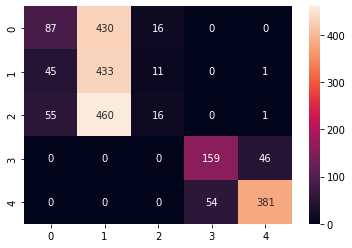

In [70]:
#confusion matrix of SVM
c_mat = confusion_matrix(y_test,y_pred_svm,labels=[0,1,2,4,5])
sns.heatmap(c_mat,annot=True,fmt='g')
plt.show()

In [71]:
# classification report of Naive Bayes
classes = ['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']
nb_cls_report = classification_report(y_test, y_pred_nb, target_names=classes)
print('classification report of Naive Bayes:\n')
print(nb_cls_report)

classification report of Naive Bayes:

                    precision    recall  f1-score   support

            LAYING       0.18      0.09      0.12       537
           SITTING       0.29      0.71      0.42       491
          STANDING       0.19      0.02      0.04       532
           WALKING       0.46      0.48      0.47       496
WALKING_DOWNSTAIRS       0.35      0.33      0.34       420
  WALKING_UPSTAIRS       0.71      0.79      0.75       471

          accuracy                           0.39      2947
         macro avg       0.36      0.40      0.35      2947
      weighted avg       0.36      0.39      0.34      2947



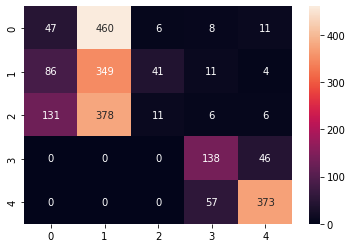

In [72]:
#confusion matrix of Naive Bayes
c_mat = confusion_matrix(y_test,y_pred_nb,labels=[0,1,2,4,5])
sns.heatmap(c_mat,annot=True,fmt='g')
plt.show()

Results summary

In [ ]:
test=X_test.values[0]
test.tofile('data2.csv', sep = ',')
colum_values = train_data.columns

In [ ]:
pickle.dump(Log_reg2, open("Log_reg2.pkl","wb"))
lr_reloaded = pickle.load(open("/content/Log_reg2.pkl",'rb'))

In [ ]:
result = lr_reloaded.predict()